# Initial Analysis
---

Specifically, “Physical activity was assessed on at least three days (one weekend day, and two weekdays).  Total activity counts (AC) per day over the course of time with which the monitor was worn were calculated. Then, to derive average total AC per day, this number was divided by the total
number of valid days worn. Ultimately, total average daily steps, as well as the time that was spent in sedentary, light, moderate, and strenuous activity was provided.”


### References
* Markers of branched-chain amino acid catabolism are not affected by exercise training in pregnant women with obesity
Brittany R. Allman, Beverly J. Spray, Kelly E. Mercer, Aline Andres, and Elisabet Børsheim
Journal of Applied Physiology 2021 130:3, 651-659; [https://doi.org/10.1152/japplphysiol.00673.2020](https://doi.org/10.1152/japplphysiol.00673.2020)
*Diaz, EC, Cleves, MA, DiCarlo, M, et al. Parental adiposity differentially associates with newborn body composition. Pediatric Obesity. 2020; 15:e12596. [https://doi.org/10.1111/ijpo.12596](https://doi.org/10.1111/ijpo.12596)


### Acronym
* **PA**: physical activity
* **AC**: activity count

## Objective

* **Assess PA on at least 3 days (5 days max) including one weekend day and 2 weekdays. We exclude incomplete day, i.e. the first day and the last day.**
    * *Create a function to select week day versus weekend day.*
* **Total AC per day over the minimum of day**
    * *Create a function to find the minimum of day.*
* **Average AC per day**
* **Total average daily steps**
* **Time spent in sedentary, light, moderate and vigorous activity** 

## Load input: packages, external functions, input data.

### Packages

In [1]:
############
# PACKAGES #
###########

using DataFrames, Dates, CSV, Missings
using PyPlot, StatsBase, Statistics, FreqTables
PyPlot.svg(true)
ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1278
┌ Info: Precompiling FreqTables [da1fdf0e-e0ff-5433-a45f-9bb5ff651cb1]
└ @ Base loading.jl:1278


### External Functions

In [2]:
######################
# External Functions #
######################

# Include the modules directory
dirFun = realpath("../src/")
include(dirFun*"/ActTools.jl");
include(dirFun*"/ActStatData.jl"); # include(dirFun*"/ActPlotData.jl"))
include(dirFun*"/GetBio.jl");
include(dirFun*"/AccDynamics.jl");


### Data

In [3]:
# List of visit directories
listDir = ["../data/Baseline Visit Data/";
           "../data/32 Week Gestation Data/";
           "../data/6 Week PP Data/";
           "../data/6 Months PP Data/";
           "../data/12 Months PP Data/"]

# Visit Dictionary 
dictVisitName =  Dict(1=>"VisitBaseline",
                    2=>"Visit32w",
                    3=>"Visit6wPP",
                    4=>"Visit6mPP",
                    5=>"Visit12mPP");

# Load the group assignment information
groupFileName = realpath(string(@__DIR__, "../data/Group/group_assignement.csv"))
global dfGroup = DataFrame!(CSV.File(groupFileName));
sort!(dfGroup);

# output directory
outDir = "../data/data_processed/";


Extract data for one visit:

In [4]:
visit = 1
# Get the path of the directory 
myDir = abspath(string(@__DIR__,listDir[visit]));

# Get the data list files from the directory myDir
(actFiles, bioFiles) = ActStatData.filesNoNaN(myDir);

There is no file with NA missing data in the following directory:
C:\git\smartphysicalactivity\data\Baseline Visit Data\


In [5]:
length(actFiles)

273

### Complete Time series

 
|Visit        | Sample Size | Possible Follow Up|
|-------------|------------:|------------------:|
|Baseline     | 272         | 272               |
|32 weeks     | 191         | 181               |
|6 days PP    | 179         | 158               |
|6 months PP  | 139         | 116               | 
|12 months PP |  51         |  37               |


## Average AC, steps and activity levels

In [6]:
# loop for visit
for j in 1:2
    # Get the path of the directory 
    myDir = abspath(string(@__DIR__,listDir[j]));
    
    # Get the data list files from the directory myDir
    (actFiles, bioFiles) = ActStatData.filesNoNaN(myDir);

    # initialize  results data frame 
    numIndiv = length(actFiles)
    vID = zeros(Int64, numIndiv)
    mRslts = zeros(6)
    
    # loop for indiv
    for i in 1:numIndiv
        # load data 
        dfTmp = ActStatData.readActivity(myDir*actFiles[i]);
        vID[i] = GetIndivID(myDir*bioFiles[i]); 

        # get total information
        dfTT  = ActStatData.getIndivTotal(dfTmp, true, thresh = 250)

        if ActStatData.checkRequiredDays(dfTT)
            # get average results
            vRslts = mean.(eachcol(dfTT[:,5:end]))
        else # check all active days
            dfTT  = ActStatData.getIndivTotal(dfTmp, true, thresh = 9000)
            if ActStatData.checkRequiredDays(dfTT)
                # get average results
                vRslts = mean.(eachcol(dfTT[:,5:end]))
            else
                vRslts = repeat([missing], 6)
            end
        end

        mRslts = hcat(mRslts, vRslts)
    end



    mRslts = copy(transpose(mRslts[:,2:end]))

    dfRslts = DataFrame(studyID = vID,
                        AvgAC = mRslts[:, 1],
                        AvgSteps = mRslts[:, 2],
                        AvgSedentary = mRslts[:, 3],
                        AvgLight = mRslts[:, 4],
                        AvgModerate = mRslts[:, 5],
                        AvgVigorous = mRslts[:, 6])

    outFileName = string(outDir,"AvgSummary_", dictVisitName[j], ".csv")
    dfRslts |> CSV.write(outFileName)
    
end

There is no file with NA missing data in the following directory:
C:\git\smartphysicalactivity\data\Baseline Visit Data\
There is no file with NA missing data in the following directory:
C:\git\smartphysicalactivity\data\32 Week Gestation Data\


In [297]:

myDir = abspath(string(@__DIR__,listDir[2]));
    
# Get the data list files from the directory myDir
(actFiles, bioFiles) = ActStatData.filesNoNaN(myDir);
dfTmp = ActStatData.readActivity(myDir*actFiles[22]);
dfTT  = ActStatData.getIndivTotal(dfTmp, false, thresh = 9000)

There is no file with NA missing data in the following directory:
C:\git\smartphysicalactivity\data\32 Week Gestation Data\


,Day,DateTime,DayName,DayOfWeek,TotalAC,TotalSteps,Sedentary,Light
,Int64,Date,String,Int64,Int64,Int64?,Float64,Float64
1,1,2018-04-25,Wednesday,3,279303,12072,276.0,505.0
2,2,2018-04-26,Thursday,4,290425,14110,571.0,813.0
3,3,2018-04-27,Friday,5,336890,14834,548.0,784.0
4,4,2018-04-28,Saturday,6,353408,16663,619.0,731.0
5,5,2018-04-29,Sunday,7,1965,85,1434.0,6.0
6,6,2018-04-30,Monday,1,216322,11128,656.0,750.0
7,7,2018-05-01,Tuesday,2,348450,16626,429.0,930.0
8,8,2018-05-02,Wednesday,3,217862,10572,908.0,466.0
9,9,2018-05-03,Thursday,4,6398,268,1401.0,37.0


## Explore results

In [277]:
# Load data
vstFileName = realpath(string(outDir,"AvgSummary_", dictVisitName[1], ".csv"))
dfSmrz = DataFrame(CSV.File(vstFileName));

In [278]:
# Join Group information
df = leftjoin(dfGroup, dfSmrz, on = :studyID)
# Drop rows containing missing
dropmissing!(df)
size(df)

(267, 8)

## Histogram

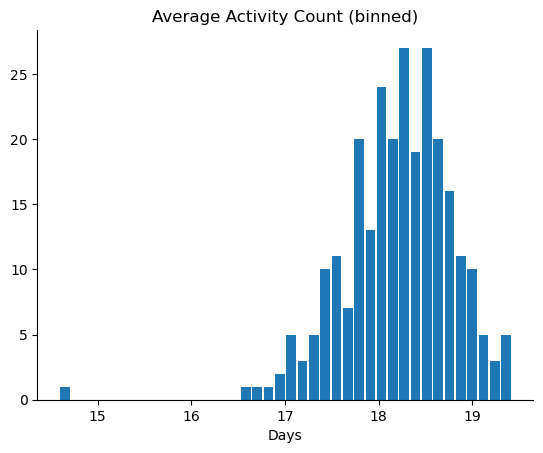

In [231]:
hist(select(df, :AvgAC => ByRow(x->log2(x))=> :X)[:,1], 40, rwidth=0.85);
xlabel("Days");
title("Average Activity Count (binned)");
ax2 = gca();
ax2.spines["top"].set_visible(false); # Hide the top edge of the axis
ax2.spines["right"].set_visible(false); # Hide the right edge of the axis

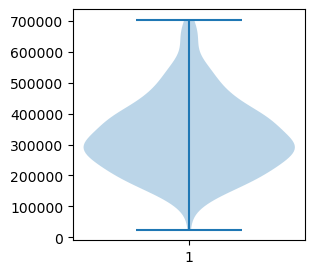

In [223]:

PyPlot.svg(true)
fig, ax = subplots(figsize=(3,3))
ax.set_xticks([1, 2])
plt.violinplot(tt);

In [ ]:
myDir = abspath(string(@__DIR__,listDir[1])); 
dfTT  = ActStatData.getIndivTotal(ActStatData.readActivity(myDir*actFiles[1]), true, thresh =9000)

In [283]:
 ActStatData.checkRequiredDays(dfTT)

false

In [281]:
 mean.(eachcol(dfTT[:,5:end]))

6-element Array{Float64,1}:
 297315.2
  15505.0
    652.8
    709.6
     77.6
      0.0

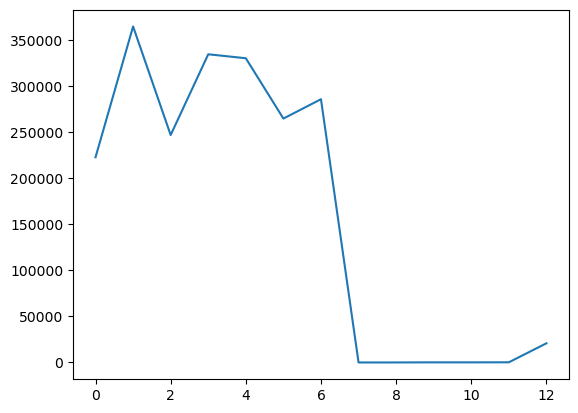

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000032700D00>

In [253]:
plot(dfTT.TotalAC)

In [249]:
thrs = median(dfTT.TotalAC)
filter(row->row.TotalAC > median(thrs), dfTT )

,Day,DateTime,DayName,DayOfWeek,TotalAC,TotalSteps,Sedentary,Light
,Int64,Date,String,Int64,Int64,Int64?,Float64,Float64
1,3,2017-08-19,Saturday,6,660093,31304,519.0,602.0
2,6,2017-08-22,Tuesday,2,528028,24097,348.0,936.0
3,7,2017-08-23,Wednesday,3,624003,25184,379.0,836.0
4,8,2017-08-24,Thursday,4,516112,24896,289.0,969.0
